# Ejercicio: Análisis de rutas GPS
**Autor**: José A. Troyano.   **Revisores**: Carlos G. Vallejo, Mariano González, Miguel Toro, Fermín Cruz.   **Última modificación:** 8/11/2018

Las rutas GPS (también llamadas _tracks_) contienen información sobre los puntos de un determinado trayecto. Casi cualquier dispositivo que tenga GPS (móviles, relojes, pulseras fitbit, ...) permite registrar esta información. Existen varios formatos para representar rutas como, por ejemplo, <code>TCX</code>, <code>GPX</code>, <code>KML</code>, <code>GDB</code>, ... 

Para no complicar el ejercicio con la lectura de un formato complejo, trabajaremos con un formato simple: <code>CSV</code>. Los datos que acompañan el ejercicio se corresponden con una ruta real en formato <code>TCX</code> que ha sido procesada para extraer solo los valores que usaremos en el ejercicio. El formato <code>TCX</code> está basado en <code>XML</code>, contiene más información y es bastante más complejo que el formato con el que trabajaremos. He aquí, a modo de curiosidad, un fragmento del fichero <code>TCX</code> del que se han extraido los datos de entrada: 
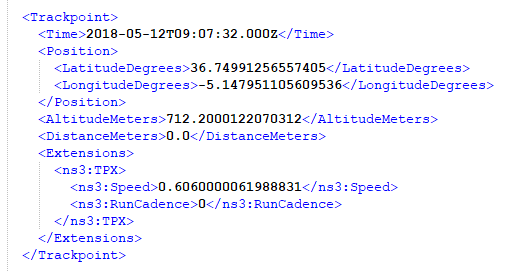
Para implementar algunas de las funciones que nos hacen falta, haremos uso de utilidades disponibles en la librería estándar de Python y en el paquete <code>matplotlib</code>. Para ello, antes de empezar, deberemos importar los siguientes elementos:

In [ ]:
import csv
from datetime import datetime
from math import sin, cos, sqrt, atan2, radians
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from collections import namedtuple

## 1. Carga de datos

El formato de entrada con el que trabajaremos contempla una línea por cada punto del trayecto que incluye cuatro informaciones:

- <code>tiempo</code> en el que fue tomada la medición
- <code>latitud</code> del punto en el que fue tomada la medición
- <code>longitud</code> del punto en el que fue tomada la medición
- <code>altitud</code> del punto en el que fue tomada la medición

He aquí un fragmento de dicho fichero con las cinco primeras líneas:

<pre>
     00:00:00,36.74991256557405,-5.147951105609536,712.2000122070312
     00:00:30,36.75008556805551,-5.148005923256278,712.7999877929688
     00:01:30,36.75017642788589,-5.148165263235569,714.0
     00:02:04,36.750248931348324,-5.148243047297001,714.5999755859375
     00:02:19,36.750430315732956,-5.148255117237568,715.0
</pre>

### 1.1 Función de lectura

La siguiente función será la encargada de leer el fichero de entrada, y construir a partir de él una estructura de datos en memoria. Usaremos una lista de <code>namedtuple</code> para almacenar todos los puntos que contiene una ruta:

In [ ]:
# Creación de un tipo 'namedtuple' para los puntos
Punto = namedtuple('Punto', 'tiempo latitud longitud altitud')

def lee_puntos(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de puntos
    
    ENTRADA: 
       - fichero: nombre del fichero de datos -> str
    SALIDA: 
       - lista de puntos del trayecto -> [Punto(datetime, float, float, float)] 

    Cada línea del fichero se corresponde con un punto del recorrido, y se representa
    con una tupla con los siguientes valores:
        - tiempo: momento en el que se realizó el registro
        - latitud: número real con la latitud del punto en grados
        - longitud: número real con la longitud del punto en grados
        - altitud: número real con la altitud del punto en metros
    
    Para convertir una cadena con el formato HH:MM:SS en un objeto 'time' usaremos
    la siguiente expresión:
    
        datetime.strptime(tiempo,'%H:%M:%S')
    '''
    pass

In [ ]:
# Test de la función lee_puntos
puntos = lee_puntos('./data/ruta.csv')
print(len(puntos))
print(puntos[:5])

## 2. Funciones de transformación y filtrado

En esta sección implementaremos distintas funciones de filtrado, consulta y cálculo de nuevas informaciones, que nos servirán para obtener diversos indicadores sobre el trayecto analizado.

### 2.1. Filtrado por tiempos

La primera de las funciones se llama <code>filtra_por_tiempo</code> y nos permitirá extraer un fragmento del trayecto dados dos instantes de tiempo. Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función:

In [ ]:
def filtra_por_tiempo(puntos, inicio, fin):
    ''' Selecciona los puntos que se encuentren entre dos instantes de tiempo
    
    ENTRADA: 
       - puntos: lista de puntos del trayecto -> [Punto(datetime, float, float, float)] 
       - inicio: hora de inicio del filtro -> str
       - fin: hora de fin del filtro -> str
    SALIDA: 
       - lista de puntos del trayecto -> [(datetime, float, float, float)] 

    Toma como entrada una lista de puntos y dos instantes de tiempo en formato
    'HH:MM:SS'. Produce como salida otra lista de puntos en la que solo se incluyen
    aquellos que se han registrado entre ambos instantes de tiempo.
    '''
    pass

In [ ]:
# Test de la función filtra_por_tiempo
primera_parte = filtra_por_tiempo(puntos, '00:00:00', '11:48:00')
print(len(primera_parte))
print(primera_parte[:5])

segunda_parte = filtra_por_tiempo(puntos, '11:48:01', '23:36:00')
print(len(segunda_parte))
print(segunda_parte[:5])

### 2.2. Cálculo de distancias entre dos coordenadas geográficas

Para que calcula la distancia (en kilómetros) entre dos coordenadas geográficas especificadas mediante latitud y longitud se puede usar la distancia <a href= 'https://es.wikipedia.org/wiki/F%C3%B3rmula_del_haversine'>haversine</a>. Proporcionamos implementada la función <code>distancia_haversine</code>:

In [ ]:
def distancia_haversine(coord_a, coord_b):
    ''' Cálculo de la distancia entre dos coordenadas geográficas
    
    ENTRADA: 
       - coord_a: coordenadas del primer punto -> (float, float) 
       - coord_b: coordenadas del segundo punto -> (float, float)
    SALIDA: 
       - distancia entre ambos puntos -> float
       
    Recibe como entrada dos coordenadas, cada una de ellas representada mediante una tupla
    (latitud,longitud) y calcula la distancia en kilómetros mediante la fórmula
    del haversine.
    '''
    radio_tierra = 6373.0
    latitud_a, longitud_a = radians(coord_a[0]), radians(coord_a[1])
    latitud_b, longitud_b = radians(coord_b[0]), radians(coord_b[1])    
    inc_lat  = latitud_b - latitud_a
    inc_long = longitud_b - longitud_a

    a = sin(inc_lat / 2)**2 + cos(latitud_a) * cos(latitud_b) * sin(inc_long / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return radio_tierra * c

In [ ]:
# Test de la función distancia_haversine
sevilla = (37.3828300, -5.9731700)
cadiz = (36.5008762, -6.2684345)
print(distancia_haversine(sevilla, cadiz))

La función <code>distancia_haversine</code> no tiene en cuenta la diferencia de altitud al calcular la distancia entre dos coordenadas. Para ello, implementaremos la función <code>distancia_haversine_3d</code> apoyándonos en el teorema de Pitágoras:

$$
distancia\_3d = \sqrt{(distancia\_2d)^2 + (incremento\_altitud)^2}
$$

In [ ]:
def distancia_haversine_3d(coord_a, coord_b):
    ''' Cálculo de la distancia entre dos coordenadas geográficas considerando altitud
    
    ENTRADA: 
       - coord_a: coordenadas del primer punto -> (float, float, float) 
       - coord_b: coordenadas del segundo punto -> (float, float, float)
    SALIDA: 
       - distancia entre ambos puntos -> float
    
    Recibe como entrada dos coordenadas, cada una de ellas representada mediante una tupla
    (latitud,longitud,altitud) y calcula la distancia en kilómetros de la siguiente forma:
       - Calcular la diferencia de altitud de los dos puntos (en kilómetros)
       - Calcular la distancia_haversine de los dos puntos
       - Usar ambos valores y el teorema de Pitágoras para calcular la distancia haversine_3d
    '''
    pass

In [ ]:
# Test de la función distancia_haversine_3d
coord_1 = (36.74991256557405,-5.147951105609536,712.2000122070312)
coord_2 = (36.75008556805551,-5.148005923256278,712.7999877929688)
print(distancia_haversine(coord_1, coord_2))      # Funciona bien con tuplas de 3 valores gracias al tipado dinámico de Python
print(distancia_haversine_3d(coord_1, coord_2))

### 2.3. Distancia y velocidad por trayecto

En esta sección implementaremos dos funciones para calcular, respectivamente, la distancia y la velocidad en un determinado trayecto.

In [ ]:
def distancia_trayecto(puntos):
    ''' Cálculo de la distancia de un trayecto
    
    ENTRADA: 
       - puntos: lista de puntos del trayecto -> [Punto(datetime, float, float, float)] 
    SALIDA: 
       - distancia total del trayecto -> float 
    
    Recibe como entrada un trayecto representado mediante una lista de tuplas
    (tiempo,latitud,longitud,altitud) y calcula la distancia total en kilómetros. 
    Se seguirán los siguientes pasos:
       - Calcular a partir de la lista puntos una lista de coordenadas 
         (latitud,longitud,altitud)
       - Calcular una lista de intervalos cada uno de ellos representado mediante
         una tupla de dos coordenadas (inicio_intervalo, fin_intervalo)
       - Usar la función distancia_haversine_3d para calcular la distancia total
         del trayecto
    '''
    pass

In [ ]:
# Test de la función distancia_trayecto
print(distancia_trayecto(puntos))
print(distancia_trayecto(primera_parte))
print(distancia_trayecto(segunda_parte))

In [ ]:
def velocidad_trayecto(puntos):
    ''' Cálculo de la velocidad en un trayecto
    
    ENTRADA: 
       - puntos: lista de puntos del trayecto -> [Punto(datetime, float, float, float)] 
    SALIDA: 
       - velocidad media durante el trayecto -> float 
    
    Recibe como entrada un trayecto representado mediante una lista de tuplas
    (tiempo,latitud,longitud,altitud) y calcula la velocidad media en km/h
    en dicho trayecto. Para calcular la duración, en horas, de un periodo de
    tiempo comprendido entre los momentos inicio y fin se puede usar la 
    siguiente expresión:
          duracion = (fin - inicio).seconds/3600
    '''
    pass

In [ ]:
# Test de la función velocidad_trayecto
print(velocidad_trayecto(puntos))
print(velocidad_trayecto(primera_parte))
print(velocidad_trayecto(segunda_parte))

### 2.4. Desnivel acumulado

La función de consulta <code>desnivel_acumulado</code> calcula, a partir de un trayecto, una tupla con dos informaciones:
- **Desnivel acumulado de subida**: suma de la altitud ganada en todos los intervalos de subida.
- **Desnivel acumulado de bajada**: suma de la altitud perdida en todos los intervalos de bajada.

In [ ]:
def desnivel_acumulado(puntos):
    ''' Cálculo del desnivel acumulado (de subida y bajada) de un trayecto
    
    ENTRADA: 
       - puntos: lista de puntos del trayecto -> [Punto(datetime, float, float, float)] 
    SALIDA: 
       - desniveles acumulados de subida y bajada -> (float, float) 
    
    Recibe como entrada un trayecto representado mediante una lista de tuplas
    (tiempo,latitud,longitud,altitud) y calcula una tupla con los desniveles
    acumulados de subida y bajada. Se pueden seguir los siguientes pasos:
       - Calcular a partir de la lista puntos una lista de altitudes 
       - Calcular una lista de desniveles a partir de la lista de altitudes
       - Calcular una lista de desniveles de subida a partir de la lista de desniveles
       - Calcular una lista de desniveles de bajada a partir de la lista de desniveles
    '''
    pass

In [ ]:
# Test de la función desnivel_acumulado
print(desnivel_acumulado(puntos))
print(desnivel_acumulado(primera_parte))
print(desnivel_acumulado(segunda_parte))

## 3. Funciones de visualización

En esta sección implementaremos tres funciones de visualización que permitirán mostrar de forma gráfica aspectos interesantes del trayecto analizado.

### 3.1. Perfil del trayecto

In [ ]:
def mostrar_perfil(puntos):
    ''' Traza el perfil de un trayecto
    
    ENTRADA: 
       - puntos: lista de puntos del trayecto -> [Punto(datetime, float, float, float)] 
    SALIDA EN PANTALLA:
       - gráfica con el perfil del trayecto

    Toma como entrada un trayecto definido por una lista de puntos y produce como salida
    el perfil del trayecto. En el eje X se muestran los kilómetros y en el eje Y las alturas
    de los distintos puntos (en metros). Para generar la gráfica se usarán las siguientes
    instrucciones:
        kilometros = [distancia_total*i/len(altitudes) for i in range(len(altitudes))]
        plt.plot(kilometros,altitudes)
        plt.show()
    
    Donde las variables distancia y altitudes significan, respectivamente:
        - distancia_total: distancia total del trayecto
        - altitudes: lista con las altitudes de cada punto del trayecto
    '''
    pass

In [ ]:
# Test de la función mostrar_perfil
mostrar_perfil(puntos)

### 3.2. Velocidad por intervalos

In [ ]:
def mostrar_velocidad_por_intervalo(puntos):
    ''' Traza la evolución de la velocidad a lo largo del tiempo 
    
    ENTRADA: 
       - puntos: lista de puntos del trayecto -> [Punto(datetime, float, float, float)] 
    SALIDA EN PANTALLA:
       - gráfica con las velocidades por intervalo

    Toma como entrada un trayecto definido por una lista de puntos y produce como salida
    una gráfica con la velocidad en cada punto del trayecto. En el eje X se muestran los 
    kilómetros recorridos y en el eje Y las velocidades (en km/h). Para generar la gráfica
    se usarán las siguientes instrucciones:
        kilometros = [distancia_total*i/len(velocidades) for i in range(len(velocidades))]
        plt.plot(kilometros, velocidades)
        plt.show()
    
    Las variables que hay que calcular previamente son:
        - distancia_total: distancia total del trayecto
        - distancias: lista con las distancias parciales recorridas en cada intervalo del trayecto.
          La distacia parcial se calcula mediante la distancia entre los puntos de inicio y fin
          de cada intervalo.
        - tiempos: lista con el tiempo invertido en cada intervalo del trayecto
        - velocidades: lista con las velocidades en cada intervalo del trayecto. No se calcularán
          velocidades para trayectos con tiempo==0 (puede que haya alguno por errores de medida)
    '''
    pass

In [ ]:
# Test de la función mostrar_velocidad_por_intervalo
mostrar_velocidad_por_intervalo(puntos)

### 3.3. Ruta en el mapa

In [ ]:
def mostrar_ruta_en_mapa(puntos, mapa, lado=9, lat_base=-36.665, long_base=5.282, escala=0.23):
    ''' Traza un trayecto sobre un mapa
    
    ENTRADA: 
       - puntos: lista de puntos del trayecto -> [Punto(datetime, float, float, float)]
       - mapa: nombre del archivo que contiene la imagen del mapa -> str
       - lado: tamaño del cuadrado en el que se encaja la gráfica -> float
       - lat_base: latitud correspondiente a la esquina inferior izquierda de la gráfica -> float
       - long_base: latitud correspondiente a la esquina inferior izquierda de la gráfica -> float 
       - escala: escalado de la ruta para acomodarse al tamaño del mapa -> float
    SALIDA EN PANTALLA:
       - gráfica con el trayecto trazado sobre el mapa

    Toma como entrada un trayecto definido por una lista de puntos y el nombre de un archivo
    PNG que contenga un mapa. El resto de parámetros sirven para configurar el tamaño de la imagen, 
    y el desplazamiento y escalado de la ruta. Los valores por defecto de estos parámetros están
    ajustados para el mapa del ejemplo.
    
    Para generar la gráfica se usarán las siguientes instrucciones:
        img = mpimg.imread(mapa)
        plt.figure(figsize=(lado, lado))
        plt.imshow(img, zorder=0, extent=[0, lado, 0, lado])    
        xs = [(x + lat_base) * lado  / 0.23 for x, _ in lats_longs]
        ys = [(y + long_base) * lado / 0.23 for _, y in lats_longs]
        plt.scatter(ys, xs, zorder=1, s=10, color='blue')
        plt.axis('off')
        plt.show()
    
    Solo es necesario calcular la siguiente variable:
        - lats_longs: lista de tuplas (latitud, longitud) correspondientes a todos los puntos
          del trayecto.
    '''
    pass

In [ ]:
# Test de la función mostrar_ruta_en_mapa
mostrar_ruta_en_mapa(puntos, './img/mapa_ronda.png')